In [ ]:
import pandas as pd
import numpy as np
# Create a date range for the past 5 years with hourly frequency
date_rng = pd.date_range(start='2018-09-10', end='2023-09-10', freq='H')
# Create a sample dataframe
df = pd.DataFrame(date_rng, columns=['date'])
df = df.set_index('date')
df['Region_1'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_2'] = np.random.randint(0, 1000, size=(len(date_rng)))
df['Region_3'] = np.random.randint(0, 1000, size=(len(date_rng)))
# Calculate the daily total for each region
daily_totals = df.resample('D').sum()
# Calculate the hourly percentage of the daily total for each region
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[region] / df[region].resample('D').transform('sum')
# Display the first few rows of the dataframe
df.head()

In [ ]:
# Multiply the percentage columns by 100 to get the values in percentage format
for region in ['Region_1', 'Region_2', 'Region_3']:
    df[f'{region}_percentage'] = df[f'{region}_percentage'] * 100
# Display the first few rows of the dataframe after the update
df.head()

In [ ]:
# Define the time buckets
time_buckets = {
    'Jan-Feb': [1, 2],
    'Mar-May': [3, 4, 5],
    'Jun-Sep': [6, 7, 8, 9],
    'Oct-Dec': [10, 11, 12]
}
# Calculate the average percentage for each hour in each time bucket for each region
average_percentages = {}
for bucket, months in time_buckets.items():
    subset = df[df.index.month.isin(months)]
    hourly_avg = subset.groupby(subset.index.hour)[['Region_1_percentage', 'Region_2_percentage', 'Region_3_percentage']].mean()
    average_percentages[bucket] = hourly_avg
average_percentages['Jan-Feb'].head()

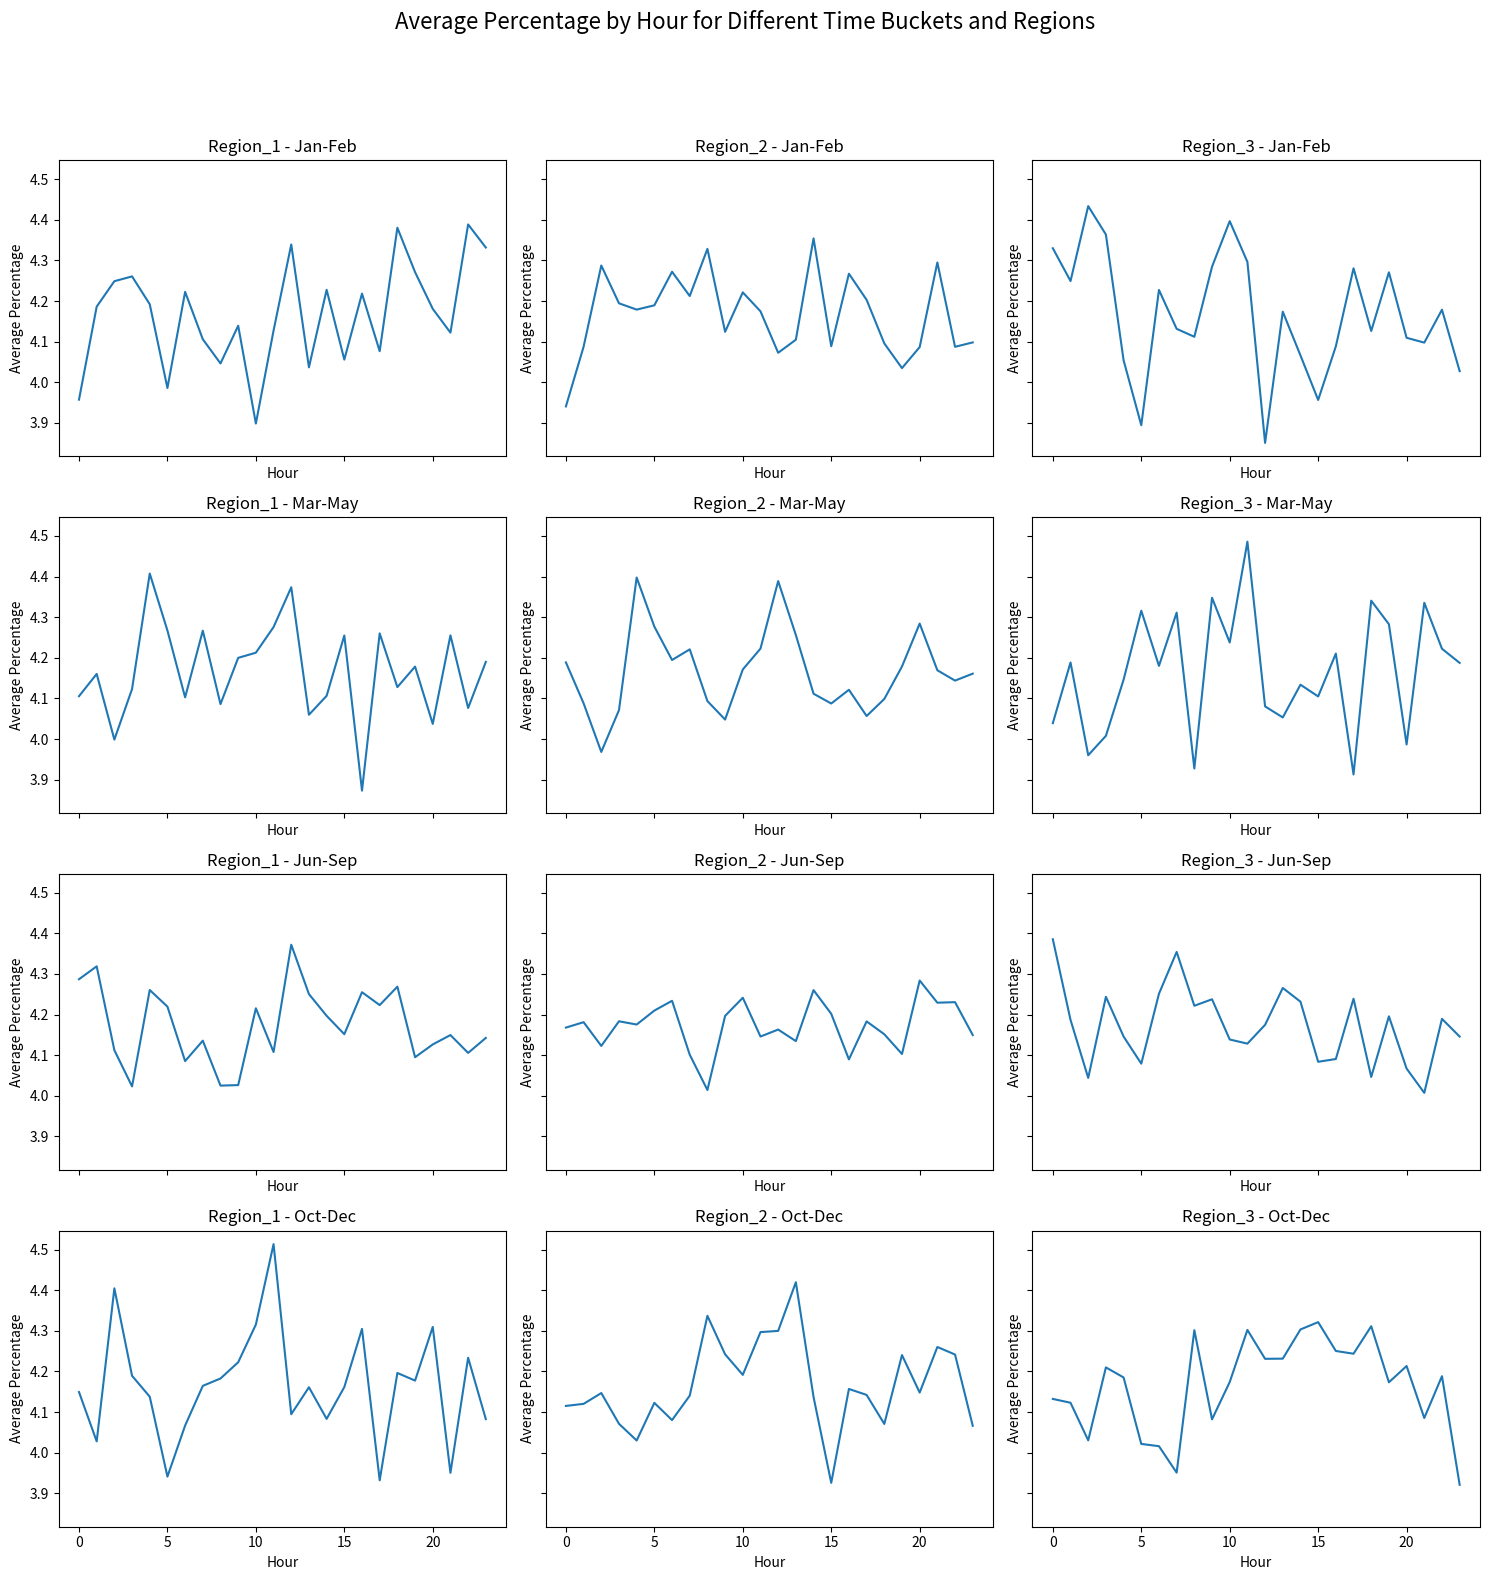

In [ ]:
import matplotlib.pyplot as plt
# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle('Average Percentage by Hour for Different Time Buckets and Regions', fontsize=16, y=1.05)
# Loop through each time bucket and region to plot the graphs
for i, (bucket, months) in enumerate(time_buckets.items()):
    for j, region in enumerate(['Region_1', 'Region_2', 'Region_3']):
        axs[i, j].plot(average_percentages[bucket].index, average_percentages[bucket][f'{region}_percentage'])
        axs[i, j].set_title(f'{region} - {bucket}')
        axs[i, j].set_xlabel('Hour')
        axs[i, j].set_ylabel('Average Percentage')
# Adjust layout
plt.tight_layout()
plt.show()